In [1]:
import pathlib
import os
import numpy as np
import re
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Cyberphys BeamNG Scenario 

## Description

The cyberphys scenario will guide a user from an initial waypoint to a final waypoint. During the course, the user may get hacked, where the car will crash and become inoperable. After some time, the car will teleport, repair itself, and the user will be able to resume driving. The experience should last around 3 minutes.


## Implementation

When to teleport and repair the vehicle can be solved via an *anomaly detection monitor*. We collect trajectories of the vehicle driven between two waypoints to build a model of acceptable trajectories that do not need our intervention (repair). Notably, we need a spatial (on road) and temporal (on time) characterization of what the anomalous requirements are. We build a regression model on the function $f: t \rightarrow \mathbb R^3$ from time to location, being produced from a random process distribution. The conditional distribution $p(\mathbf x | t_i)$ provides the density from which an anomaly can be thresholded $p(\mathbf x | t_i) < \tau$. Hence, the random process involved is *stationary* and we choose a separable covariance.


In [2]:
def get_race(rfname):
    times, pos, rot = [], [], []
    with open(rfname, "r") as f:
        txt: str = f.read()
        for line in txt.splitlines():
            m = re.match("TIME: (.*) LOCATION: (.*)", line)
            if m:
                t = eval(m.group(1))
                p, r = eval(m.group(2))
                times.append(t)
                pos.append(p)
                rot.append(r)
    return np.array(times), np.array(pos), np.array(rot)


race_files = glob.glob("race*.txt")
races = [get_race(r) for r in race_files]

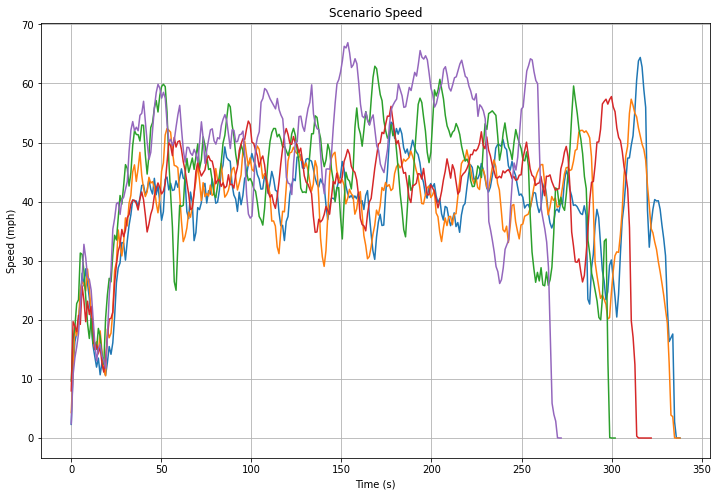

In [3]:
# plot the scenario speeds
fig, ax = plt.subplots(figsize=(12, 8))
for ridx, r in enumerate(races):
    vs , ss = [], []
    for p1, p2 in zip(r[1][:-1, :], r[1][1:, :]):
        vel = p2 - p1
        speed = np.linalg.norm(vel)
        vs.append(vel)
        ss.append(speed * 2.23)
    plt.plot(np.linspace(0, len(ss), len(ss)), ss, label=f"Race {ridx}")
    
plt.xlabel("Time (s)")
plt.ylabel("Speed (mph)")
plt.grid()
plt.title("Scenario Speed")
plt.savefig("scenario_speed.pdf")

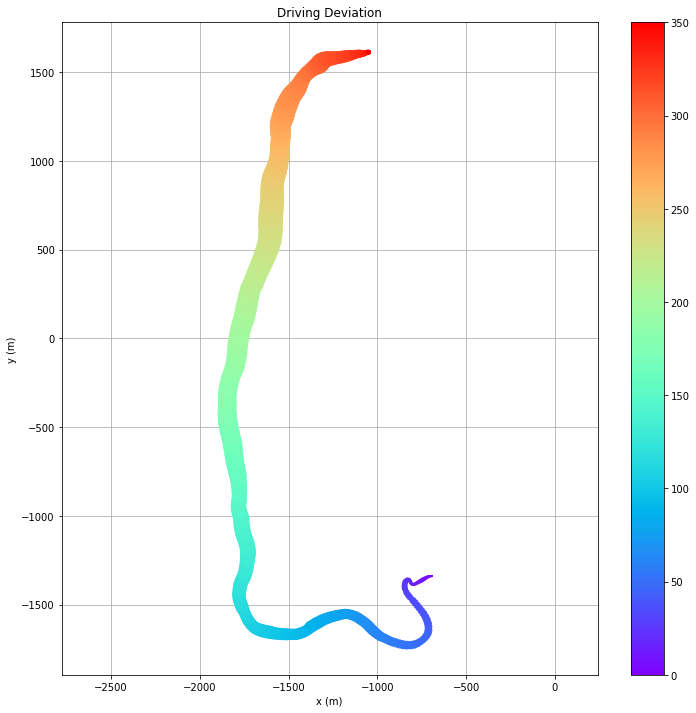

In [4]:
def get_closest_time(races, td):
    vals =[]
    for r in races:
        times = r[0]
        idx = np.argmin(np.abs(times - td))
        vals.append((r[1][idx], r[2][idx]))
    return list(zip(*vals))

# plot average position and standard deviation
fig, ax = plt.subplots(figsize=(12, 12))
avs = []
stds = []
for i in range(350):
    pos, rot = get_closest_time(races, i)
    #print(np.linalg.norm(pos, axis=1))
    av = np.mean(pos, axis=0)
    pos -= av
    dists = np.linalg.norm(pos, axis=1)
    stds.append(np.std(dists))
    avs.append(av)
cm = plt.cm.get_cmap('rainbow')
colors = np.linspace(0, 350, len(avs))
sc= plt.scatter(*(np.array(avs)[:, :-1]).T, s = np.array(stds)*3, vmin=0, vmax=350, c=colors, cmap=cm, zorder=200)
plt.colorbar(sc)
plt.axis('equal')
plt.title("Driving Deviation")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid()
plt.savefig("driving_deviation.pdf")
plt.show()

In [5]:
import sys
sys.path.append("../cyberphyslib")

In [6]:
from cyberphyslib.demonstrator import checkpoint

In [7]:
brace = checkpoint.BeamNGRace.for_besspin()

In [8]:
for idx, a in enumerate(avs):
    dists = brace.checkpoints - a
    tidx = (np.argmin(np.linalg.norm(dists, axis=1)))
    print(f"{idx} - {tidx}")

0 - 0
1 - 0
2 - 0
3 - 0
4 - 1
5 - 1
6 - 1
7 - 1
8 - 1
9 - 1
10 - 2
11 - 2
12 - 2
13 - 2
14 - 2
15 - 2
16 - 2
17 - 2
18 - 3
19 - 3
20 - 3
21 - 3
22 - 3
23 - 3
24 - 3
25 - 4
26 - 4
27 - 4
28 - 4
29 - 5
30 - 5
31 - 5
32 - 5
33 - 6
34 - 6
35 - 6
36 - 6
37 - 6
38 - 7
39 - 7
40 - 7
41 - 7
42 - 7
43 - 8
44 - 8
45 - 8
46 - 8
47 - 8
48 - 8
49 - 8
50 - 9
51 - 9
52 - 9
53 - 9
54 - 9
55 - 10
56 - 10
57 - 10
58 - 10
59 - 10
60 - 11
61 - 11
62 - 11
63 - 11
64 - 11
65 - 11
66 - 11
67 - 11
68 - 11
69 - 12
70 - 12
71 - 12
72 - 12
73 - 12
74 - 12
75 - 12
76 - 12
77 - 12
78 - 12
79 - 12
80 - 12
81 - 12
82 - 13
83 - 13
84 - 13
85 - 13
86 - 13
87 - 13
88 - 13
89 - 13
90 - 13
91 - 13
92 - 13
93 - 13
94 - 13
95 - 13
96 - 13
97 - 14
98 - 14
99 - 14
100 - 14
101 - 14
102 - 14
103 - 14
104 - 14
105 - 14
106 - 14
107 - 14
108 - 14
109 - 15
110 - 15
111 - 15
112 - 15
113 - 15
114 - 15
115 - 15
116 - 16
117 - 16
118 - 16
119 - 16
120 - 16
121 - 16
122 - 16
123 - 16
124 - 16
125 - 16
126 - 16
127 - 16
128 - 16
129 